# Define Arduino-Like Functions
Import all the usual stuff, then import our own Virtual217.py library to define some functions that we can use to practice our thinking about the Arduino model without needing the hardware. You don't need to know all the details in this code -- just run it to enable the capabilities we will use below.

Nothing can replace the real hardware. A real UNO will have slightly different timing behaviour than this simulation, for example.

The various analogRead outputs resemble things you might measure in some of the MECH 217 labs, so we can use these signals to test our ideas before we get there.

In [1]:
# gets all of numpy but you will still need to refer to e.g. numpy.random.randn() as random.randn()
from numpy import *               # all of the array capable elements for numerical data          
from scipy.stats import norm      # comprehensive functions for Gaussian normal distributions
import csv                        # library for reading and writing comma separated value files
from matplotlib.pyplot import *   # all of pyplot to graph the results of our calculations

# put figures inline in the notebook, so you don't have to call show()
%matplotlib inline

# This lets you make the default figure size larger (or smaller)
from IPython.core.pylabtools import figsize
figsize(14, 7)

from Virtual217 import *

## Take some data and print it out
This is very similar to the code we would write for the Arduino, to read data from two analog inputs and print it out occasionally to see the results.


In [2]:
lastPrint = 0

def setup():
    # Serial.begin(115200); // not needed in the python version
    P("In the setup() function")
    P("\n")

def loop():
    global lastPrint          # use the global version
    tNowS = micros()/1000000  # read the time
    d0 = analogRead(A0)       # read an analog value
    d1 = analogRead(A1)       # read an analog value
    
    if(micros() - lastPrint > 1000000):  # don't print very often
        lastPrint = micros()             # update the last time you printed
        P(tNowS)                         # print stuff out
        PCS(d0)
        PCSL(d1)

        
runArduino(setup,loop,10) # run the Arduino sketch for a while


In the setup() function
1.000337, 146, 162
2.001505, 145, 161
3.002425, 146, 163
4.003263, 147, 267
5.003657, 147, 555
6.003947, 145, 760
7.004357, 146, 772
8.00457, 145, 768
9.005329, 145, 769


## Display the signals we can read with the Arduino
This cell will take quite a long time to run, but will eventually generate a graph of the way the various analog channels change over time. Part of the reason it takes so long is the delay we put in the simulated analogRead() function to intentionally slow down the whole process to be closer to the Arduino processing speed scale. The other part is that we made the signals change relatively slowly over time, so we have to wait for all of these changes to take place in real time. Your code will be much simpler!

In the setup() function
4.999533, 145.0, 553.0, 321.0, 369.0, 249.0, 146.0
10.000334, 144.0, 757.0, 218.0, 338.0, 250.0, 147.0
15.000823, 181.0, 182.0, 319.0, 413.0, 252.0, 233.0
20.002411, 201.0, 162.0, 320.0, 400.0, 250.0, 253.0
25.003513, 219.0, 553.0, 320.0, 393.0, 251.0, 261.0
30.003605, 232.0, 757.0, 315.0, 502.0, 251.0, 263.0
35.00382, 240.0, 180.0, 317.0, 525.0, 253.0, 264.0
40.00434, 247.0, 162.0, 323.0, 519.0, 251.0, 264.0
45.00598, 251.0, 555.0, 319.0, 53.0, 252.0, 263.0
50.007259, 256.0, 757.0, 316.0, 250.0, 249.0, 261.0
55.007894, 258.0, 181.0, 317.0, 249.0, 251.0, 263.0
60.008456, 257.0, 163.0, 318.0, 250.0, 252.0, 261.0
65.009284, 261.0, 557.0, 414.0, 398.0, 252.0, 263.0


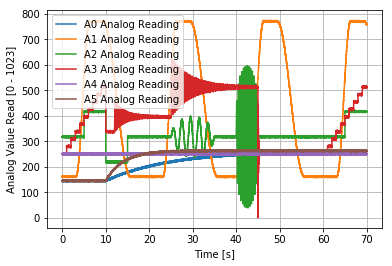

In [4]:
watchFor = 70                  # rough number of seconds to watch the data
# more than number of iterations reading all six channels at about 10000 Hz
n = int(10000 * watchFor / 6)
d = zeros((n,7))              # a large space to keep the data
cnt = 0                       # total number of iterations completed

lastPrint = 0

def setup():
    # Serial.begin(115200); // not needed in the python version
    P("In the setup() function")
    P("\n")

def loop():
    global lastPrint,d,cnt
    tNowS = micros()/1000000

    d[cnt,0] = tNowS          # this bit is just for the graph and too huge for Arduino
    for j in range(0,6):
        d[cnt,j+1] = analogRead(A0+j)
    
    if(micros() - lastPrint > 5000000):
        lastPrint = micros()
        P(d[cnt,0])
        for j in range(0,6): PCS(d[cnt,j+1])
        P("\n")
    cnt = cnt + 1
    
runArduino(setup,loop,watchFor)

for j in range(0,6):
    plot(d[:cnt,0],d[:cnt,j+1],label="A%d Analog Reading"%j)
grid()
legend()
xlabel("Time [s]")
ylabel("Analog Value Read [0 - 1023]")

savetxt("analogRead.csv", d[:cnt], delimiter=",")   # write the CSV file
